In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gourmet-food-procurement-data/Good_Food_Purchasing_Data.csv


In [2]:
data=pd.read_csv("/kaggle/input/gourmet-food-procurement-data/Good_Food_Purchasing_Data.csv")
data

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17203,Department of Education,2020-2021,Produce,Vegetables,"vegetable, blend, frozen, commodity",Veg Mixed Vegetable No Salt Added Frzn USDA (VO),"NA, NA",NaN,NaN,9239.0,0.0,49463.0
17204,Department of Education,2020-2021,Seafood,Seafood,"fish, patty, breaded",Fish Breaded Patty,"NA, New Hampshire",NaN,NaN,7316.0,0.0,164246.0
17205,Department of Education,2020-2021,Seafood,Seafood,"tuna, light, canned",Fish Tuna Light Can,"Golbon, NA",FoodCo,FoodCo,1978.0,49450.0,130101.0
17206,Department of Education,2020-2021,Seafood,Seafood,"tuna, light, canned",Fish Tuna Light Can,"Golbon, NA",Teri Nichols,Teri Nichols,2903.0,72575.0,167341.0


<Axes: >

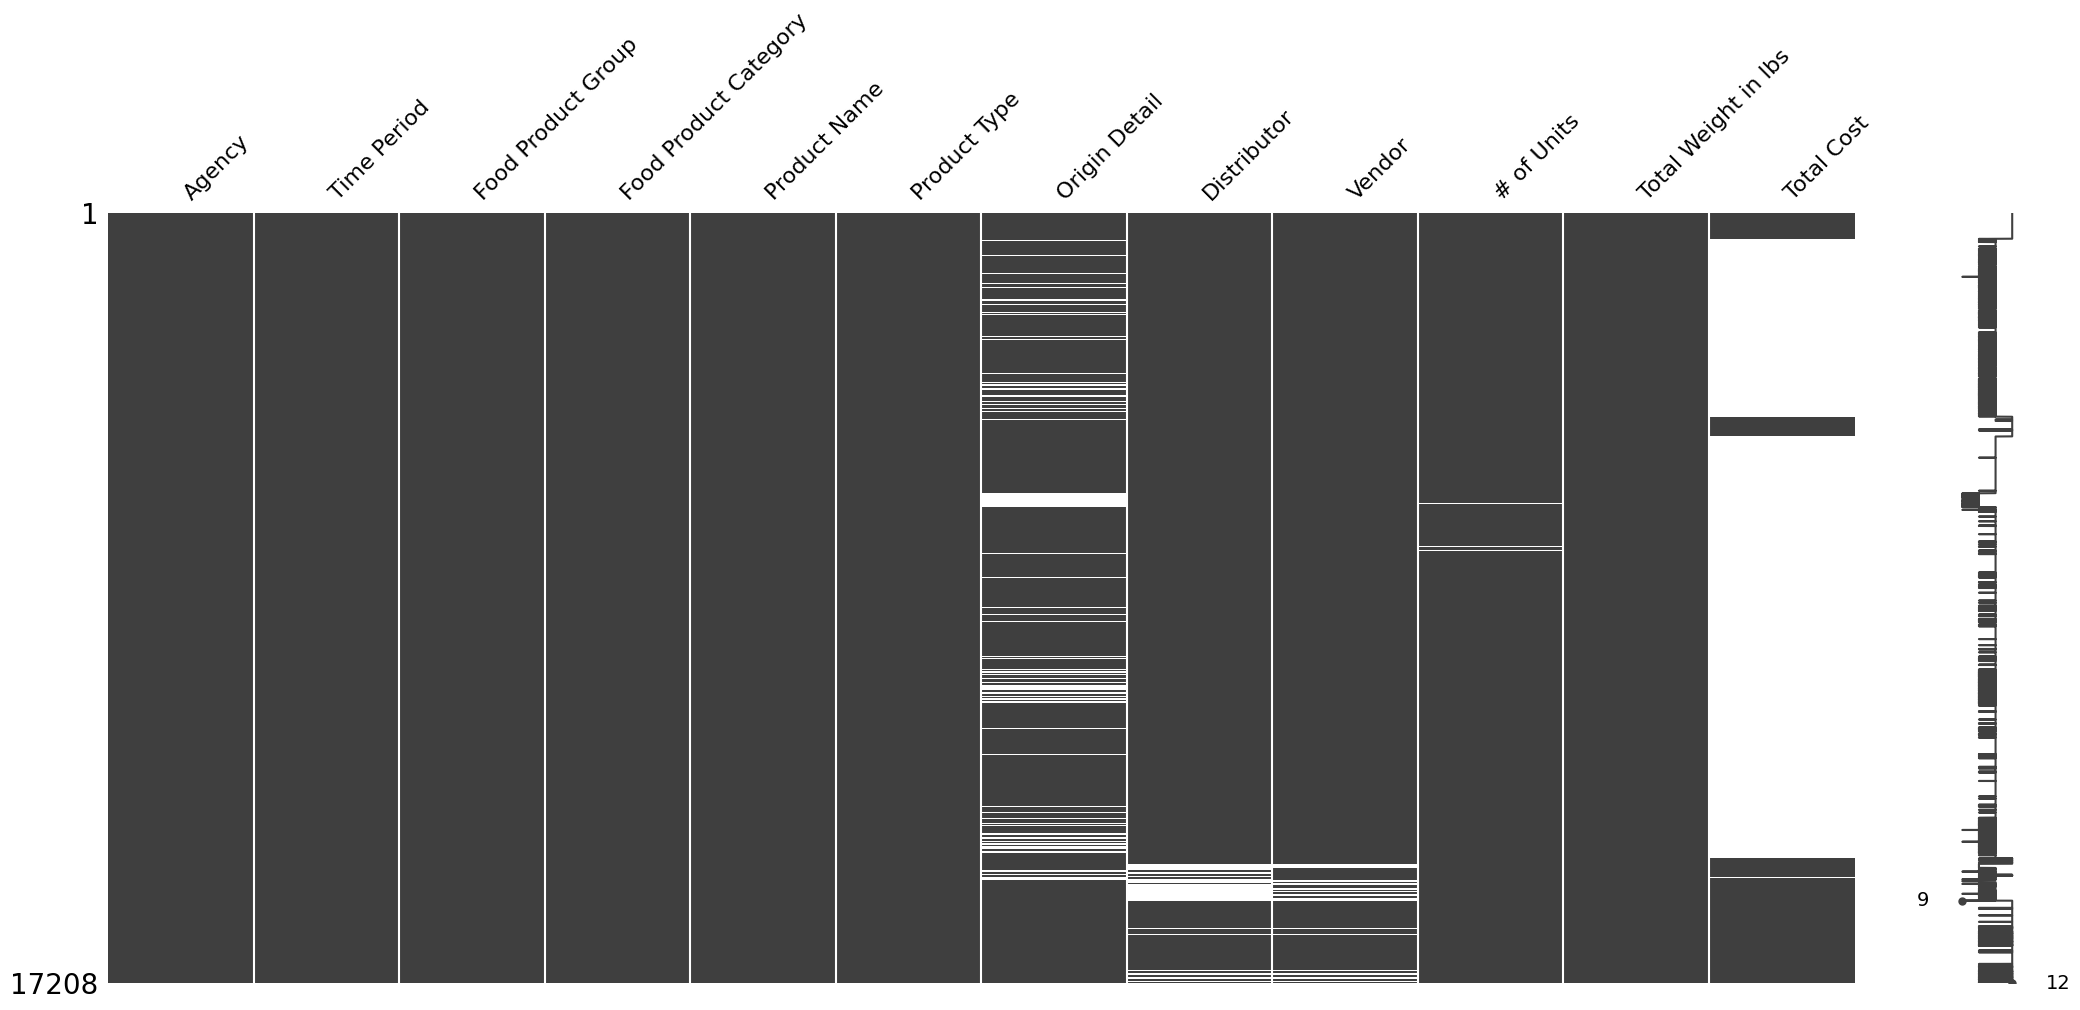

In [3]:
#checking for missing values using missingno

import missingno as msno
msno.matrix(data)

# **EDA**

In [4]:
# Display the first few rows of the dataset
print(data.head())


                                  Agency Time Period   Food Product Group  \
0  Administration for Childrens Services   2018-2019                Meals   
1  Administration for Childrens Services   2018-2019                Meals   
2  Administration for Childrens Services   2018-2019                Meals   
3  Administration for Childrens Services   2018-2019            Beverages   
4  Administration for Childrens Services   2018-2019  Condiments & Snacks   

  Food Product Category                 Product Name  \
0                 Meals  baby food, dinner, assorted   
1                 Meals  baby food, dinner, assorted   
2                 Meals           baby food, formula   
3             Beverages       juice, fruit punch, ss   
4   Condiments & Snacks        cereal, baby, oatmeal   

                                        Product Type Origin Detail  \
0         Stage 2 Baby Food Dinner, Assorted Variety     Beech-Nut   
1         Stage 3 Baby Food Dinner, Assorted Variety     Bee

In [5]:
# Check data types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17208 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 17208 non-null  object 
 1   Time Period            17208 non-null  object 
 2   Food Product Group     17208 non-null  object 
 3   Food Product Category  17208 non-null  object 
 4   Product Name           17207 non-null  object 
 5   Product Type           17208 non-null  object 
 6   Origin Detail          15059 non-null  object 
 7   Distributor            16297 non-null  object 
 8   Vendor                 16722 non-null  object 
 9   # of Units             17152 non-null  float64
 10  Total Weight in lbs    17150 non-null  float64
 11  Total Cost             3767 non-null   float64
dtypes: float64(3), object(9)
memory usage: 1.6+ MB
None


In [6]:
# Summary statistics
print(data.describe())


         # of Units  Total Weight in lbs    Total Cost
count  1.715200e+04         1.715000e+04  3.767000e+03
mean   1.915848e+04         2.886157e+04  1.398539e+05
std    5.987577e+05         3.260171e+05  4.243162e+05
min   -3.600000e+01        -2.330000e+02  0.000000e+00
25%    3.000000e+00         2.200000e+01  1.210000e+03
50%    1.700000e+01         1.470000e+02  1.570800e+04
75%    2.110000e+02         1.811500e+03  9.308300e+04
max    5.050947e+07         2.525474e+07  9.110741e+06


<Figure size 1200x600 with 0 Axes>

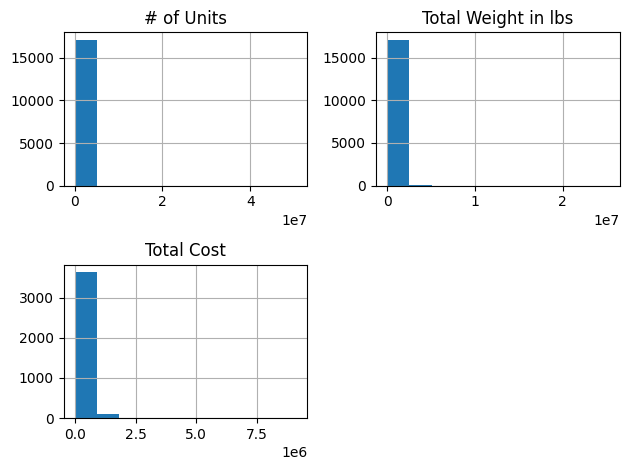

In [7]:
# Distribution of numerical variables
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data.hist()
plt.tight_layout()
plt.show()

# **Categorical Variables**

In [8]:
# Unique values and their counts in categorical columns
for column in data.select_dtypes(include='object'):
    print(f"Unique values in {column}: {data[column].nunique()}")
    print(data[column].value_counts())
    print("\n")


Unique values in Agency: 7
Agency
Health + Hospitals                        9428
Department of Homeless Services           3977
Department of Education                   2664
Department of Correction                   441
Administration for Children's Services     409
Administration for Childrens Services      167
Human Resources Administration             122
Name: count, dtype: int64


Unique values in Time Period: 3
Time Period
2019-2020    8685
2020-2021    4606
2018-2019    3917
Name: count, dtype: int64


Unique values in Food Product Group: 9
Food Product Group
Condiments & Snacks        4881
Produce                    3821
Meals                      2086
Meat                       1786
Bread, Grains & Legumes    1557
Beverages                  1396
Milk & Dairy               1297
Seafood                     383
Non-Food                      1
Name: count, dtype: int64


Unique values in Food Product Category: 25
Food Product Category
Condiments & Snacks      4881
Meals         

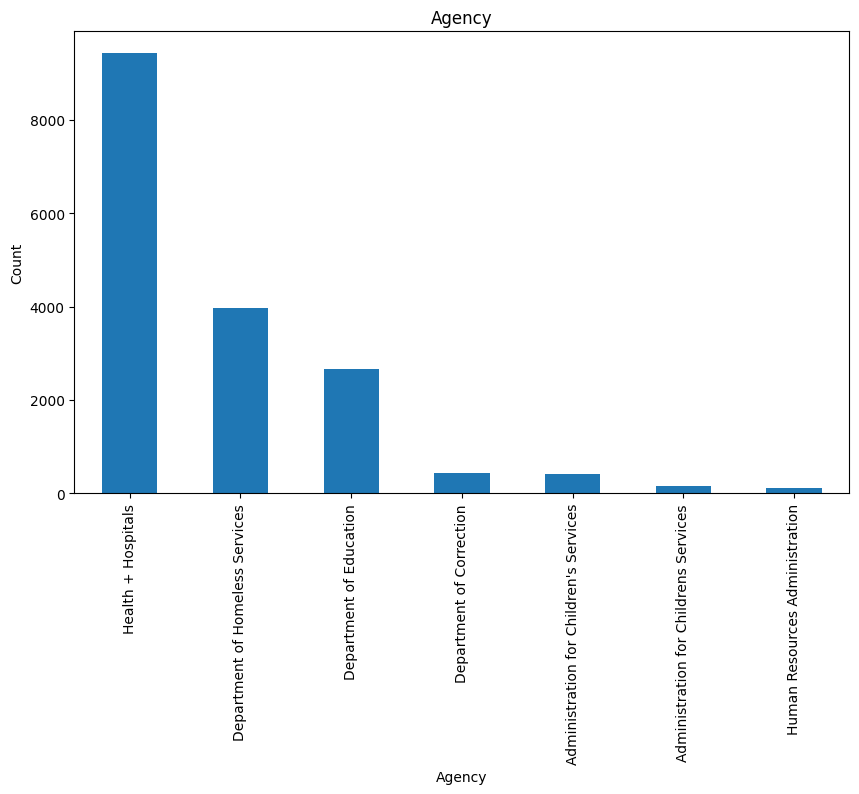

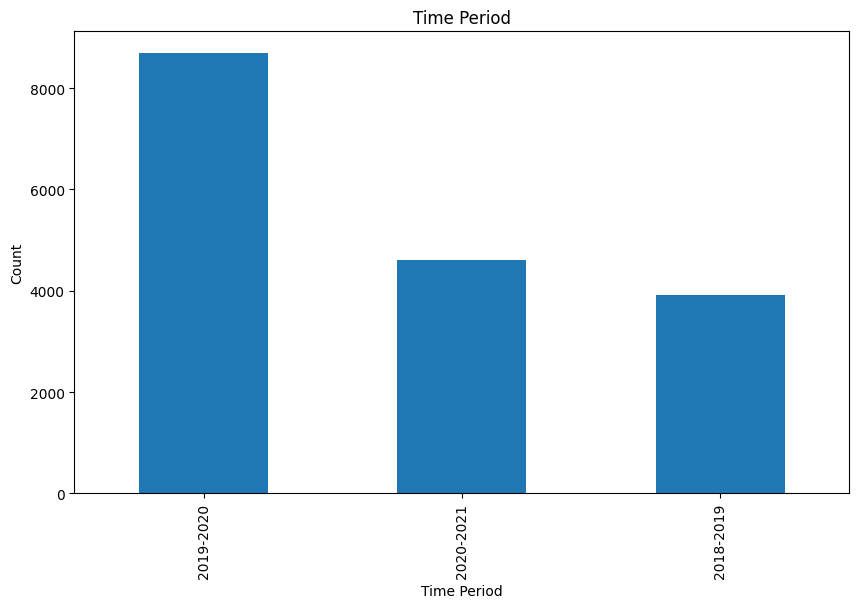

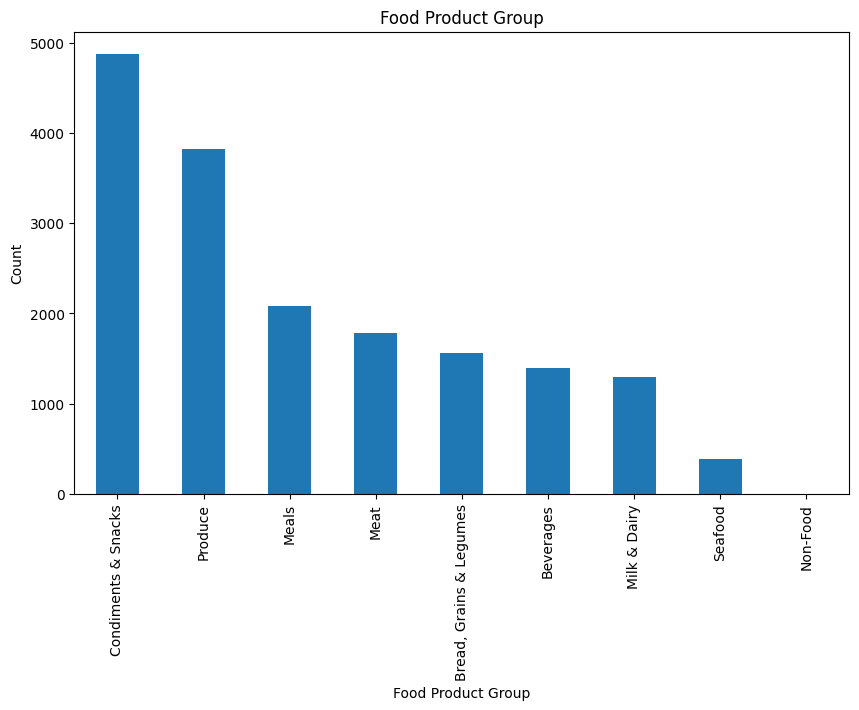

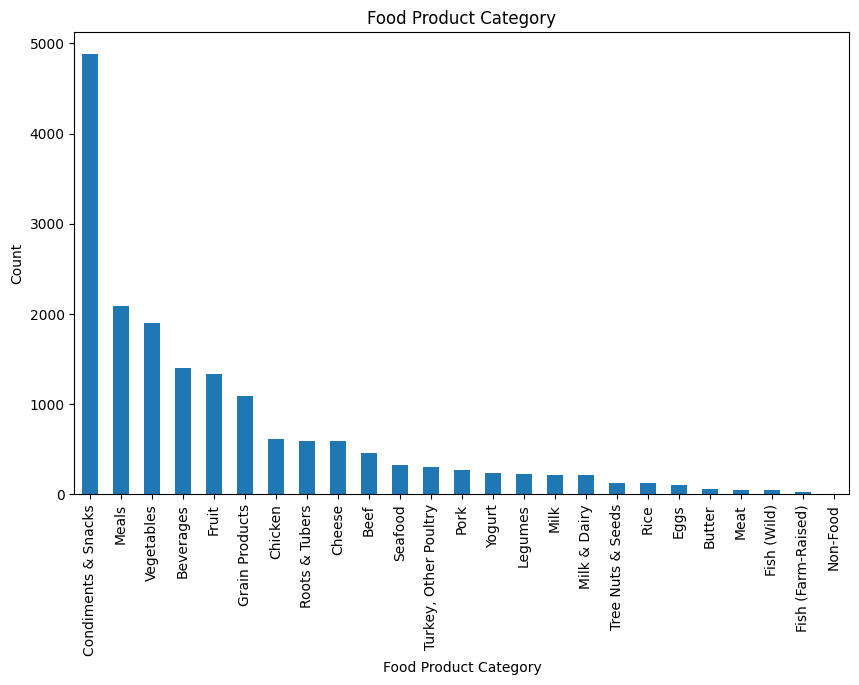

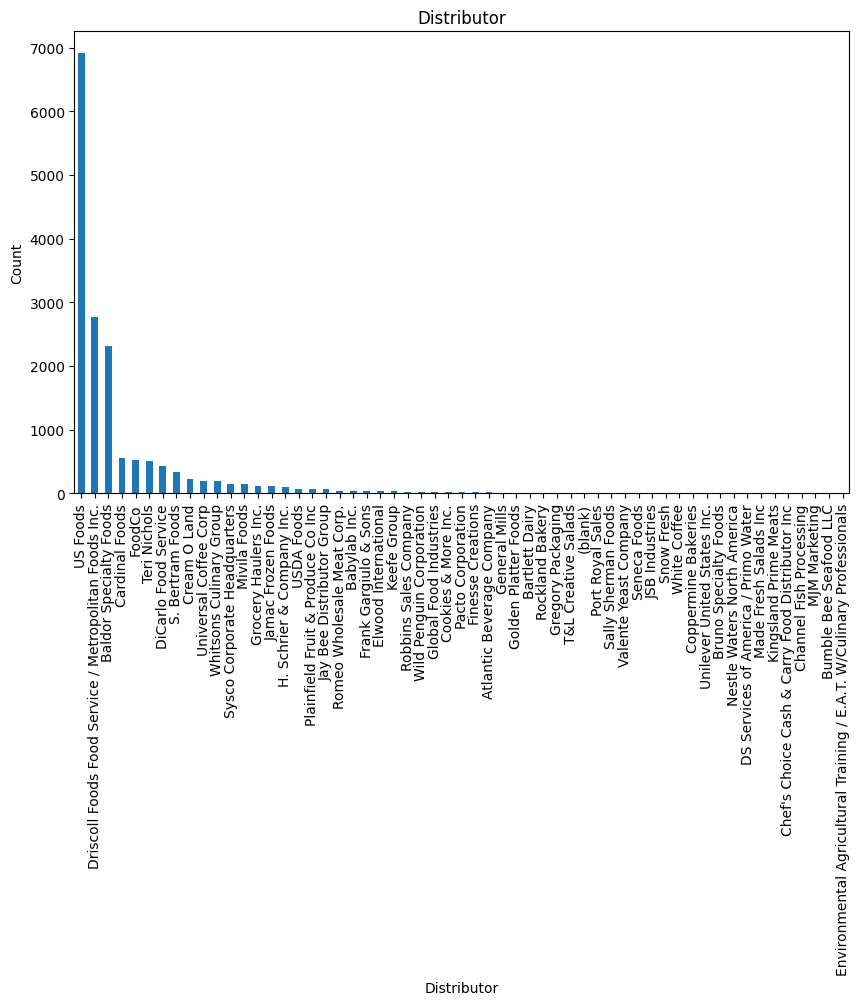

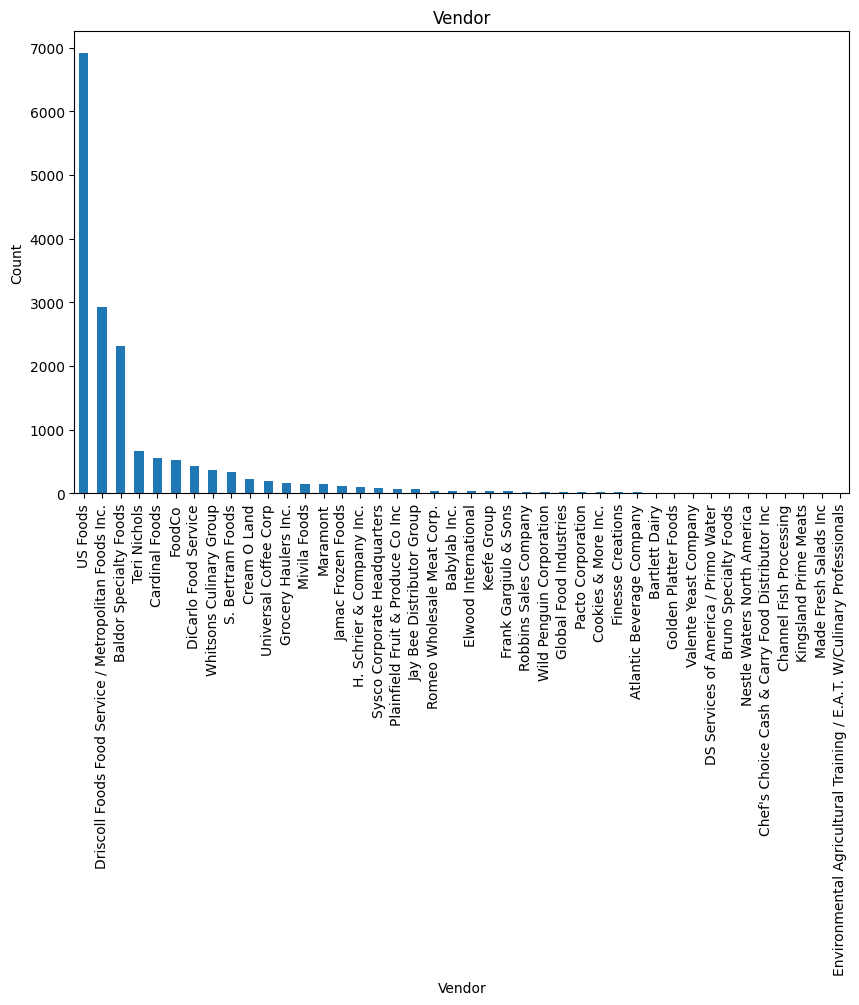

In [9]:
# Visualize categorical variables using bar charts
for column in data.select_dtypes(include='object'):
    if column not in ['Product Type', 'Product Name','Origin Detail']:
        plt.figure(figsize=(10, 6))
        data[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()


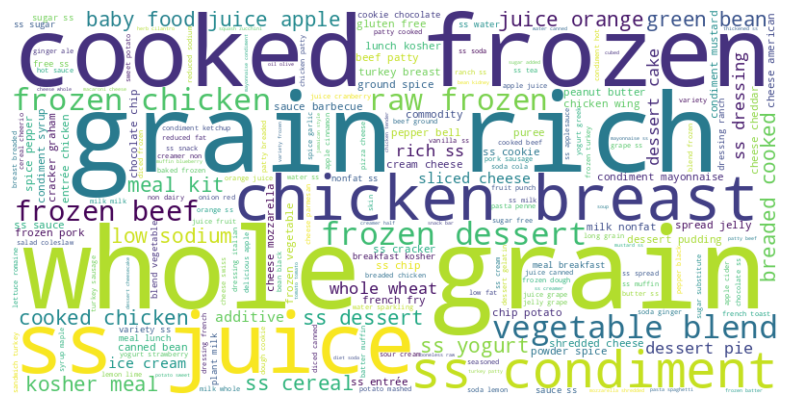

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

product_names = data['Product Name'].dropna().astype(str)

# Concatenate all product names into a single string
text = ' '.join(product_names)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


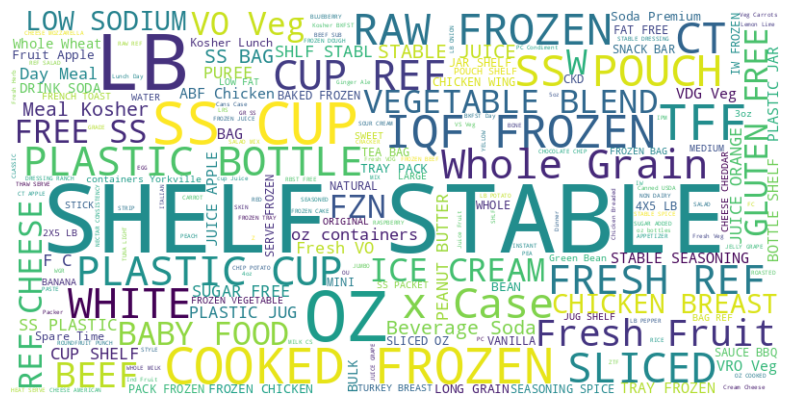

In [11]:
# Assuming 'Product Name' is the column you want to create a word cloud from
product_names = data['Product Type'].dropna().astype(str)

# Concatenate all product names into a single string
text = ' '.join(product_names)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
